Uma empresa de telecom gostaria de melhorar os seus resultados financeiros atuando na retenção de seus clientes, para isso ela necessita entender o perfil dos usuários com maior propensão a churn e construir uma jornada para garantir a continuidade deste usuário.
Com base neste desafio:  
   1) Quais as características que aumentam o risco de churn?
   2) Qual seria sua proposta para reter os usuários? 
 
Expectativa de entrega:

   1. Construir material contemplando os insights, modelos e resultados.
   2. Material utilizado para análise (códigos, etc)

- **Customer ID:** A unique ID that identifies each customer

- **Gender:** The customer's gender: Male, Female

- **Age:** The customer's current age, in years, at the time the fiscal quarter ended (Q2 2022)

- **Married:** Indicates if the customer is married: Yes, No

- **Number of Dependents:** Indicates the number of dependents that live with the customer (dependents could be children,parents, etc)

- **City:** The city of the customer's primary residence in California

- **Zip Code:** The zip code of the customer's primary residence

- **Latitude:** The latitude of the customer's primary residence

- **Longitude:** The longitude of the customer's primary residence

- **Number of Referrals:** Indicates the number of times the customer has referred a friend or family member to this company to date

- **Tenure in Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified

- **Offer:** Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E

- **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

- **Avg Monthly Long Distance Charges:** Indicates the customer's average long distance charges, calculated to the end of the quarter specified above

- **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

- **Internet Service:** Indicates if the customer subscribes to Internet service with the company: Yes, No

- **Internet Type:** Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable

- **Avg AVG Monthly GB Download:** Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above

- **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

- **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

- **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment

- **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced

- **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider at no

- **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee:Yes, No

- **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee:Yes, No

- **Unlimited Data:** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No

- **Contract:**: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year

- **Paperless Billing:**: Indicates if the customer has chosen paperless billing: Yes, No

- **Payment Method:**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

- **Monthly Charge:**: Indicates the customer's current total monthly charge for all their services from the company

- **Total Charges:**: Indicates the customer's total charges, calculated to the end of the quarter specified above

- **Total Refunds:**: Indicates the customer's total refunds, calculated to the end of the quarter specified above

- **Total Extra Data Charges:**: Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the

- **Total Long Distance Charges:**: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter

- **Total Revenue:**: Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above

- **Customer Status:**: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

- **Churn Category:**: A high-level category for the customer's reason for churning, which is asked when they leave the company

- **Churn Reason:**: A customer's specific reason for leaving the company, which is asked when they leave the company


# Pacotes e leitura dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [116]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
df = pd.read_excel("telecom_customer_churn.xlsx")

In [118]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Customer ID,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS
Gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female
Age,37,46,50,78,75,23,67,52,68,43
Married,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
Number of Dependents,0,0,0,0,0,3,0,0,0,1
City,Frazier Park,Glendale,Costa Mesa,Martinez,Camarillo,Midpines,Lompoc,Napa,Simi Valley,Sheridan
Zip Code,93225,91206,92627,94553,93010,95345,93437,94558,93063,95681
Latitude,34827662,34162515,33645672,38014457,34227846,37581496,34757477,38489789,34296813,38984756
Longtitude,-118999073.0,-118203869.0,-117922613.0,-122115432.0,-119079903.0,-119972762.0,-120550507.0,-12227011.0,-118685703.0,-121345074.0
Number of Referrals,2,0,0,1,3,0,1,8,0,3


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer ID                            7043 non-null   object 
 1   Gender                                 7043 non-null   object 
 2   Age                                    7043 non-null   int64  
 3   Married                                7043 non-null   object 
 4   Number of Dependents                   7043 non-null   int64  
 5   City                                   7043 non-null   object 
 6   Zip Code                               7043 non-null   int64  
 7   Latitude                               7043 non-null   int64  
 8   Longtitude                             7043 non-null   float64
 9   Number of Referrals                    7043 non-null   int64  
 10  Tenure in Months                       7043 non-null   int64  
 11  Offe

# Hipóteses iniciais:  
- Clientes com mais tempo de contrato, tendem a ter menos Churn
- Clientes que recebem ofertas de plano, tendem a ter menos Churn

# Limpeza e estruturação dos dados

#### Informações sobre os dados faltantes

In [120]:
df.isnull().sum()

Customer ID                                 0
Gender                                      0
Age                                         0
Married                                     0
Number of Dependents                        0
City                                        0
Zip Code                                    0
Latitude                                    0
Longtitude                                  0
Number of Referrals                         0
Tenure in Months                            0
Offer                                    3877
Phone service                               0
Average Monthly Long Distance Charges     682
Multiple Lines                            682
Internet Service                            0
Internet Type                            1526
Average Monthly GB Download              1526
Online Security                          1526
Online Backup                            1526
Device Protection Plan                   1526
Premium Tech Support              

In [121]:
df.isnull().sum()/len(df)

Customer ID                              0.000000
Gender                                   0.000000
Age                                      0.000000
Married                                  0.000000
Number of Dependents                     0.000000
City                                     0.000000
Zip Code                                 0.000000
Latitude                                 0.000000
Longtitude                               0.000000
Number of Referrals                      0.000000
Tenure in Months                         0.000000
Offer                                    0.550476
Phone service                            0.000000
Average Monthly Long Distance Charges    0.096834
Multiple Lines                           0.096834
Internet Service                         0.000000
Internet Type                            0.216669
Average Monthly GB Download              0.216669
Online Security                          0.216669
Online Backup                            0.216669


#### Ajustando os dados faltantes da variável "Offers"

In [122]:
def offer_adj(offer):
    if pd.isnull(offer):
        return 'No offer'
    else:
        return offer

In [123]:
df['Offer'] =  df['Offer'].apply(offer_adj)

#### Ajustando os dados em formatos incorretos para as variáveis:
##### _'Average Monthly Long Distance Charges' ; 'Monthly Charge' ; 'Total Charges' ; 'Total Refunds' ; 'Total Long Distance Charges' ; 'Total Revenue'_

In [124]:
def charges_adj(avg):
    if pd.to_datetime(avg, errors='coerce') is not pd.NaT:
        return 0
    elif re.match(r'^\d{2}:\d{2}:\d{2}$', str(avg)):
        return 0
    elif pd.isnull(avg):
        return 0
    else:
        return avg

In [125]:
df['Average Monthly Long Distance Charges'] = df['Average Monthly Long Distance Charges'].apply(charges_adj)
df['Average Monthly Long Distance Charges'] = df['Average Monthly Long Distance Charges'].astype(float)

In [126]:
df['Monthly Charge'] = df['Monthly Charge'].apply(charges_adj)
df['Monthly Charge'] = df['Monthly Charge'].astype(float)

In [127]:
df['Total Charges'] = df['Total Charges'].apply(charges_adj)
df['Total Charges'] = df['Total Charges'].astype(float)

In [128]:
df['Total Refunds'] = df['Total Refunds'].apply(charges_adj)
df['Total Refunds'] = df['Total Refunds'].astype(float)

In [129]:
df['Total Long Distance Charges'] = df['Total Long Distance Charges'].apply(charges_adj)
df['Total Long Distance Charges'] = df['Total Long Distance Charges'].astype(float)

In [130]:
df['Total Revenue'] = df['Total Revenue'].apply(charges_adj)
df['Total Revenue'] = df['Total Revenue'].astype(float)

#### Ajustando os dados faltantes da variável "Churn Category"

In [131]:
def churn_adj(churn):
    if pd.isnull(churn):
        return 'Other'
    else:
        return churn

In [132]:
df['Churn Category'] =  df['Churn Category'].apply(offer_adj)

#### Dropando as variáveis que não serão necessárias

In [133]:
df.drop('Churn Reason',axis = 1, inplace= True)

In [134]:
df = df.dropna()

#### Criando a variável Churn

In [135]:
def class_churn(churn):
    if churn == 'Churned':
        return 1
    else:
        return 0

In [136]:
df['Churn'] = df['Customer Status'].apply((class_churn))

# Análise Exploratória

## Visualização gráfica

### Mostrando a separação entre os Churn, por status e categoria

<Figure size 1200x400 with 0 Axes>

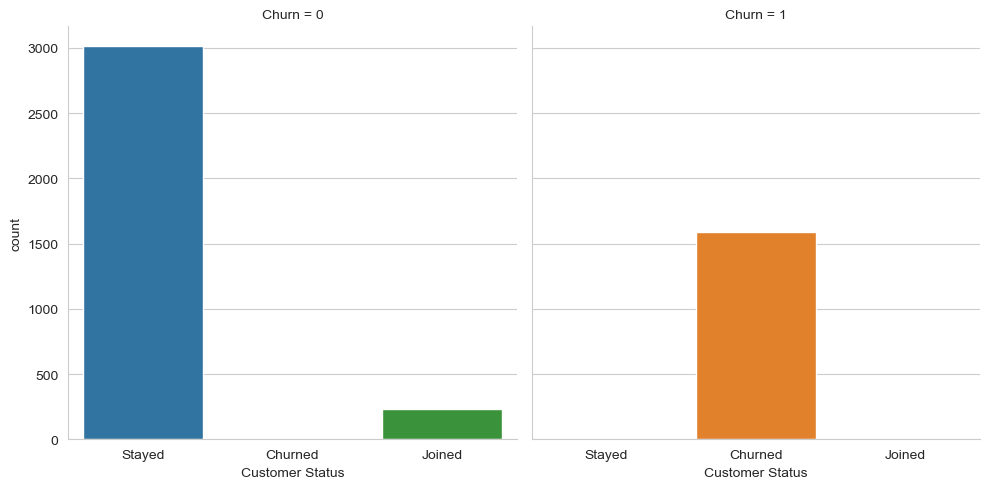

In [137]:
plt.figure(figsize=(12,4))

sns.catplot(data=df, x="Customer Status", col="Churn", kind="count")  

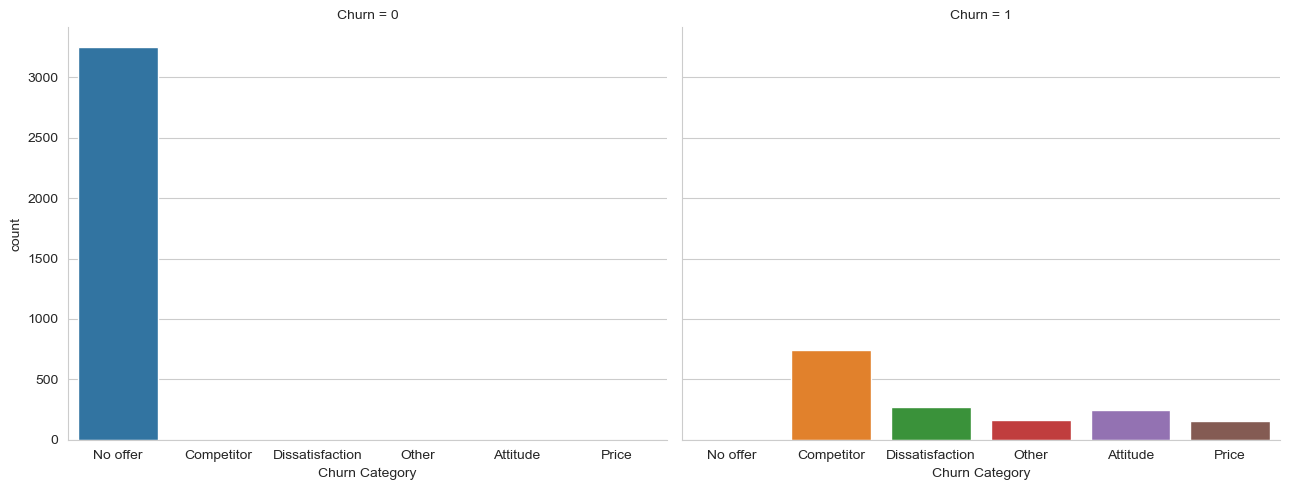

In [138]:
sns.catplot(data=df, x="Churn Category", col="Churn", kind="count", height = 5, aspect= 1.3)

### Entendendo as variáveis, para selecioná-las para o modelo

#### Gênero por Churn

In [139]:
# Criando tabela para o plot
Sexo_Churn = (
    df.groupby(["Gender", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Gender", columns="Churn", values="count")
)

# Calculando % de Churn
Sexo_Churn["Churn %"] = ( Sexo_Churn[1] / (Sexo_Churn[0] + Sexo_Churn[1]) * 100)

Sexo_Churn.reset_index(inplace= True)

Sexo_Churn

Churn,Gender,0,1,Churn %
0,Female,1607,803,33.319502
1,Male,1642,783,32.288660


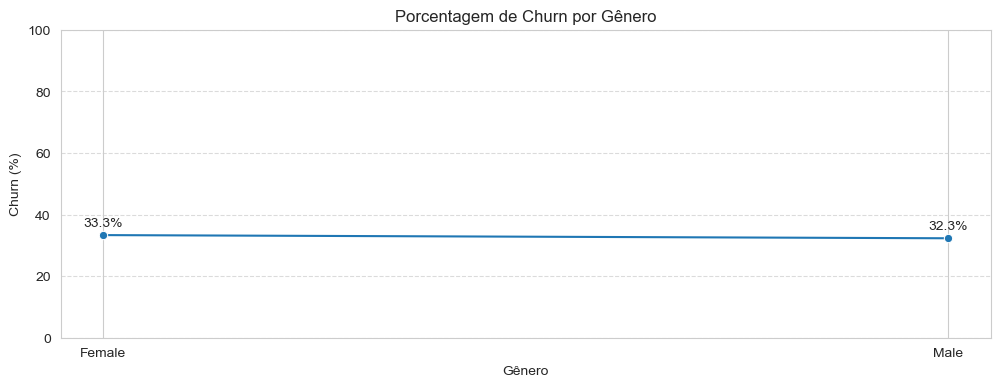

In [140]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Sexo_Churn, x="Gender", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Sexo_Churn.apply(
    lambda row: g.text(
        row["Gender"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Gênero")
plt.ylabel("Churn (%)")
plt.xlabel("Gênero")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Estado Civil por Churn

In [141]:
# Criando tabela para o plot
Casado_Churn = (
    df.groupby(["Married", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Married", columns="Churn", values="count")
)

# Calculando % de Churn
Casado_Churn["Churn %"] = ( Casado_Churn[1] / (Casado_Churn[0] + Casado_Churn[1]) * 100)

Casado_Churn.reset_index(inplace= True)

Casado_Churn

Churn,Married,0,1,Churn %
0,No,1475,1007,40.572119
1,Yes,1774,579,24.606885


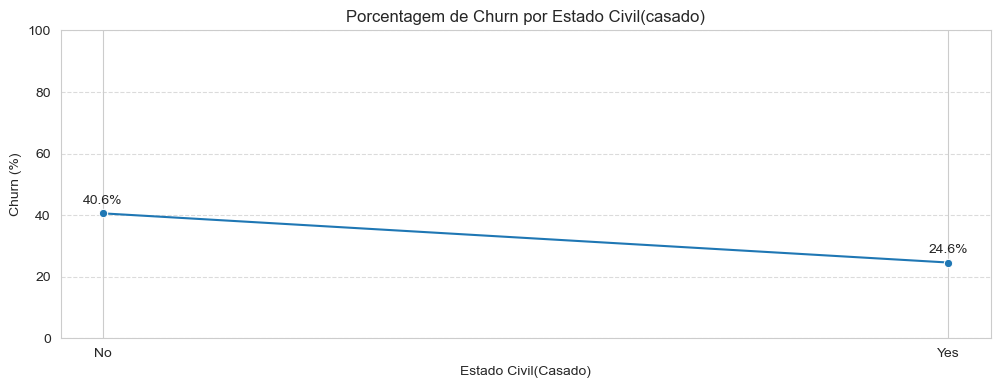

In [142]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Casado_Churn, x="Married", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Casado_Churn.apply(
    lambda row: g.text(
        row["Married"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Estado Civil(casado)")
plt.ylabel("Churn (%)")
plt.xlabel("Estado Civil(Casado)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### N° dependentes por Churn

In [143]:
# Criando tabela para o plot
Dependentes_Churn = (
    df.groupby(["Number of Dependents", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Number of Dependents", columns="Churn", values="count")
)

# Preencghendo os valores NA com 0
Dependentes_Churn.fillna(0, inplace=True)

# Calculando % de Churn
Dependentes_Churn["Churn %"] = ( Dependentes_Churn[1] / (Dependentes_Churn[0] + Dependentes_Churn[1]) * 100)

Dependentes_Churn.reset_index(inplace= True)

Dependentes_Churn

Churn,Number of Dependents,0,1,Churn %
0,0,2419.0,1509.0,38.416497
1,1,290.0,31.0,9.657321
2,2,264.0,25.0,8.650519
3,3,264.0,19.0,6.713781
4,4,4.0,1.0,20.000000
5,5,5.0,1.0,16.666667
6,6,2.0,0.0,0.000000
7,8,1.0,0.0,0.000000


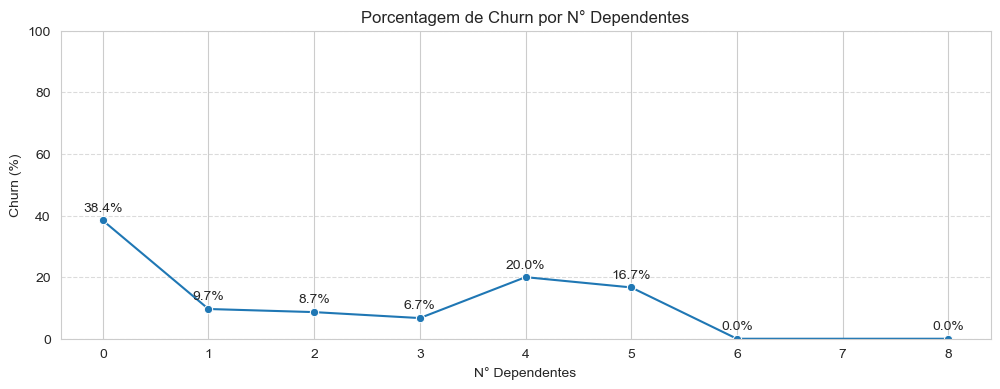

In [144]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Dependentes_Churn, x="Number of Dependents", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Dependentes_Churn.apply(
    lambda row: g.text(
        row["Number of Dependents"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por N° Dependentes")
plt.ylabel("Churn (%)")
plt.xlabel("N° Dependentes")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### N° Indicações por Churn

In [145]:
# Criando tabela para o plot
Indicacoes_Churn = (
    df.groupby(["Number of Referrals", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Number of Referrals", columns="Churn", values="count")
)
# Preencghendo os valores NA com 0
Indicacoes_Churn.fillna(0, inplace=True)

# Definindo todo o intervalo de indicações
max_referrals = int(Indicacoes_Churn.index.max())
all_referrals = np.arange(0, max_referrals + 1)

# Calculando % de Churn
Indicacoes_Churn["Churn %"] = ( Indicacoes_Churn[1] / (Indicacoes_Churn[0] + Indicacoes_Churn[1]) * 100)

Indicacoes_Churn.reset_index(inplace= True)

Indicacoes_Churn

Churn,Number of Referrals,0,1,Churn %
0,0,1556.0,1047.0,40.222820
1,1,380.0,438.0,53.545232
2,2,133.0,21.0,13.636364
3,3,134.0,28.0,17.283951
4,4,151.0,15.0,9.036145
5,5,158.0,19.0,10.734463
6,6,148.0,6.0,3.896104
7,7,167.0,6.0,3.468208
8,8,131.0,2.0,1.503759
9,9,147.0,4.0,2.649007


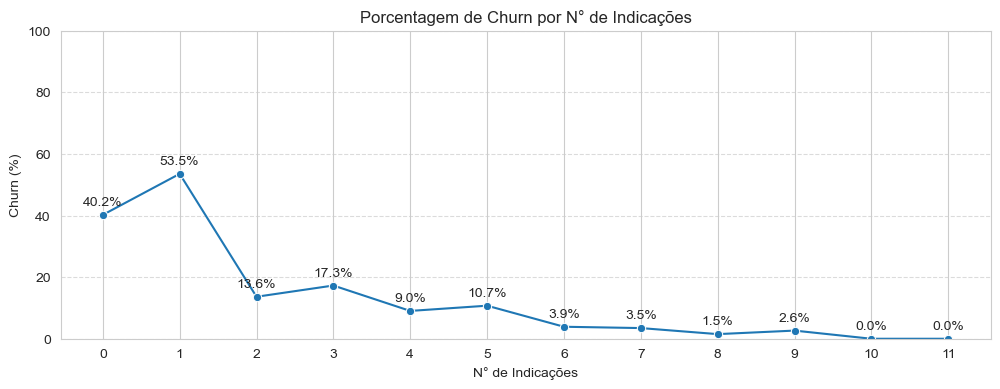

In [146]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Indicacoes_Churn, x="Number of Referrals", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Indicacoes_Churn.apply(
    lambda row: g.text(
        row["Number of Referrals"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.xticks(np.arange(0, Indicacoes_Churn["Number of Referrals"].max() + 1))
plt.title("Porcentagem de Churn por N° de Indicações")
plt.ylabel("Churn (%)")
plt.xlabel("N° de Indicações")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Tipo de Oferta por Churn

In [147]:
# Criando tabela para o plot
Offer_Churn = (
    df.groupby(["Offer", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Offer", columns="Churn", values="count")
)

# Calculando % de Churn
Offer_Churn["Churn %"] = ( Offer_Churn[1] / (Offer_Churn[0] + Offer_Churn[1]) * 100)

Offer_Churn.reset_index(inplace= True)

Offer_Churn

Churn,Offer,0,1,Churn %
0,No offer,1736,905,34.267323
1,Offer A,348,34,8.900524
2,Offer B,497,88,15.042735
3,Offer C,204,87,29.896907
4,Offer D,250,142,36.224490
5,Offer E,214,330,60.661765


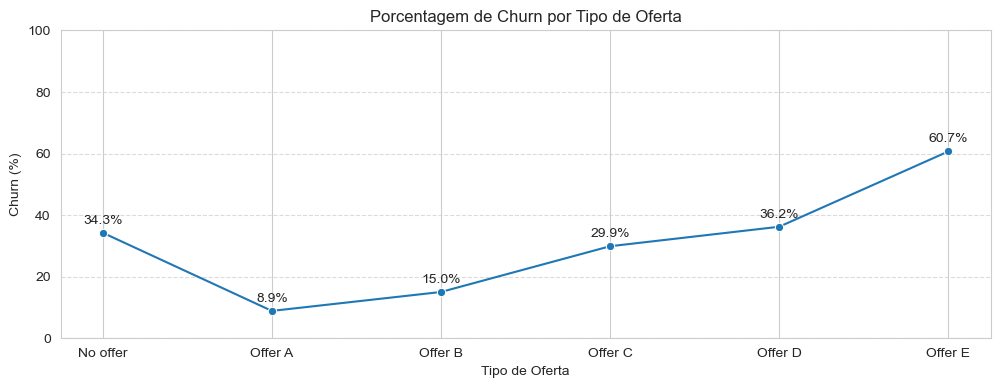

In [148]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Offer_Churn, x="Offer", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Offer_Churn.apply(
    lambda row: g.text(
        row["Offer"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Tipo de Oferta")
plt.ylabel("Churn (%)")
plt.xlabel("Tipo de Oferta")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Serviço Telefônico por Churn

In [149]:
# Criando tabela para o plot
Celular_Churn = (
    df.groupby(["Phone service", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Phone service", columns="Churn", values="count")
)

# Calculando % de Churn
Celular_Churn["Churn %"] = ( Celular_Churn[1] / (Celular_Churn[0] + Celular_Churn[1]) * 100)

Celular_Churn.reset_index(inplace= True)

Celular_Churn

Churn,Phone service,0,1,Churn %
0,Yes,3249,1586,32.802482


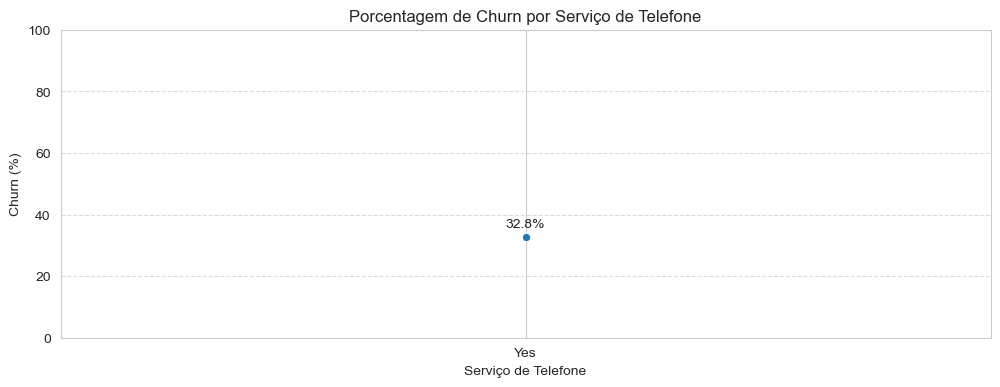

In [150]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Celular_Churn, x="Phone service", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Celular_Churn.apply(
    lambda row: g.text(
        row["Phone service"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Serviço de Telefone")
plt.ylabel("Churn (%)")
plt.xlabel("Serviço de Telefone")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Mais de uma linha telefônica por Churn

In [151]:
# Criando tabela para o plot
Linhas_Churn = (
    df.groupby(["Multiple Lines", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Multiple Lines", columns="Churn", values="count")
)

# Calculando % de Churn
Linhas_Churn["Churn %"] = ( Linhas_Churn[1] / (Linhas_Churn[0] + Linhas_Churn[1]) * 100)

Linhas_Churn.reset_index(inplace= True)

Linhas_Churn

Churn,Multiple Lines,0,1,Churn %
0,No,1460,746,33.816863
1,Yes,1789,840,31.951312


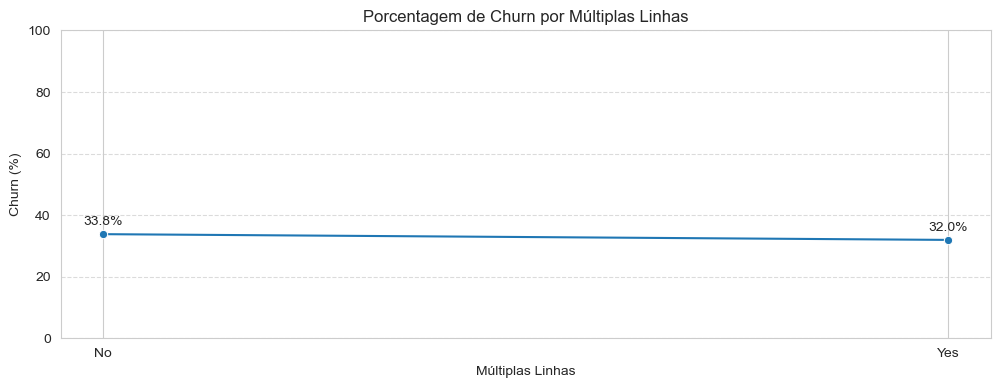

In [152]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Linhas_Churn, x="Multiple Lines", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Linhas_Churn.apply(
    lambda row: g.text(
        row["Multiple Lines"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Múltiplas Linhas")
plt.ylabel("Churn (%)")
plt.xlabel("Múltiplas Linhas")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Serviço de Internet por Churn

In [153]:
# Criando tabela para o plot
Internet_Service_Churn = (
    df.groupby(["Internet Service", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Internet Service", columns="Churn", values="count")
)

# Calculando % de Churn
Internet_Service_Churn["Churn %"] = ( Internet_Service_Churn[1] / (Internet_Service_Churn[0] + Internet_Service_Churn[1]) * 100)

Internet_Service_Churn.reset_index(inplace= True)

Internet_Service_Churn

Churn,Internet Service,0,1,Churn %
0,Yes,3249,1586,32.802482


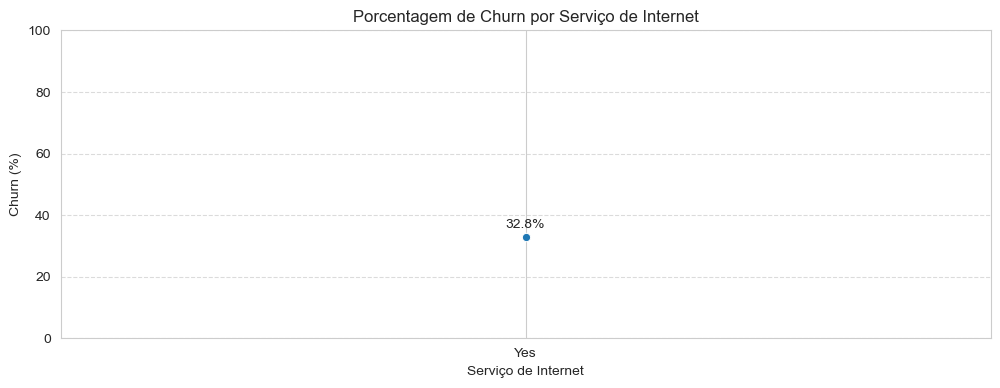

In [154]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Internet_Service_Churn, x="Internet Service", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Internet_Service_Churn.apply(
    lambda row: g.text(
        row["Internet Service"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Serviço de Internet")
plt.ylabel("Churn (%)")
plt.xlabel("Serviço de Internet")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Tipo de Internet por Churn

In [155]:
# Criando tabela para o plot
Internet_Churn = (
    df.groupby(["Internet Type", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Internet Type", columns="Churn", values="count")
)

# Calculando % de Churn
Internet_Churn["Churn %"] = ( Internet_Churn[1] / (Internet_Churn[0] + Internet_Churn[1]) * 100)

Internet_Churn.reset_index(inplace= True)

Internet_Churn

Churn,Internet Type,0,1,Churn %
0,Cable,442,159,26.455907
1,DSL,1008,191,15.929942
2,Fiber Optic,1799,1236,40.724876


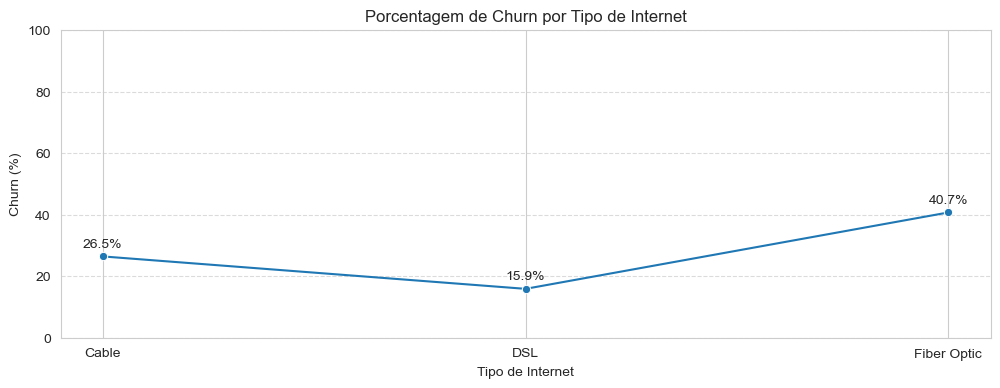

In [156]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Internet_Churn, x="Internet Type", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Internet_Churn.apply(
    lambda row: g.text(
        row["Internet Type"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Tipo de Internet")
plt.ylabel("Churn (%)")
plt.xlabel("Tipo de Internet")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Segurança da Internet por Churn

In [157]:
# Criando tabela para o plot
Security_Churn = (
    df.groupby(["Online Security", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Online Security", columns="Churn", values="count")
)

# Calculando % de Churn
Security_Churn["Churn %"] = ( Security_Churn[1] / (Security_Churn[0] + Security_Churn[1]) * 100)

Security_Churn.reset_index(inplace= True)

Security_Churn

Churn,Online Security,0,1,Churn %
0,No,1779,1320,42.594385
1,Yes,1470,266,15.322581


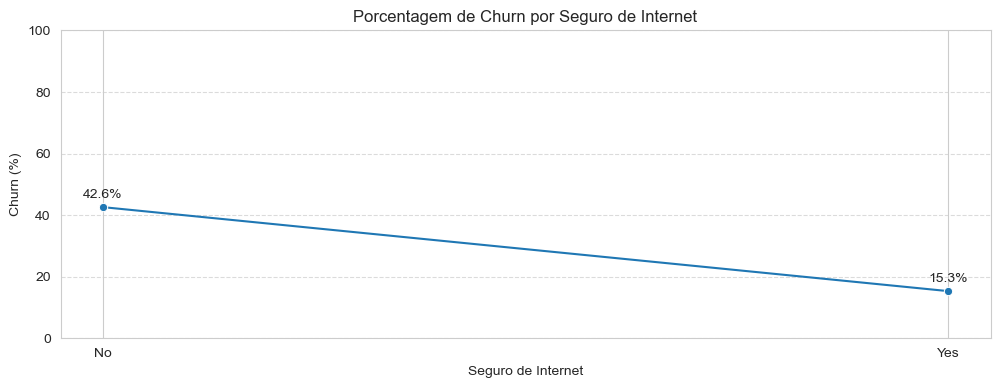

In [158]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Security_Churn, x="Online Security", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Security_Churn.apply(
    lambda row: g.text(
        row["Online Security"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Seguro de Internet")
plt.ylabel("Churn (%)")
plt.xlabel("Seguro de Internet")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Backup Online por Churn

In [159]:
# Criando tabela para o plot
Backup_Churn = (
    df.groupby(["Online Backup", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Online Backup", columns="Churn", values="count")
)

# Calculando % de Churn
Backup_Churn["Churn %"] = ( Backup_Churn[1] / (Backup_Churn[0] + Backup_Churn[1]) * 100)

Backup_Churn.reset_index(inplace= True)

Backup_Churn

Churn,Online Backup,0,1,Churn %
0,No,1579,1114,41.366506
1,Yes,1670,472,22.035481


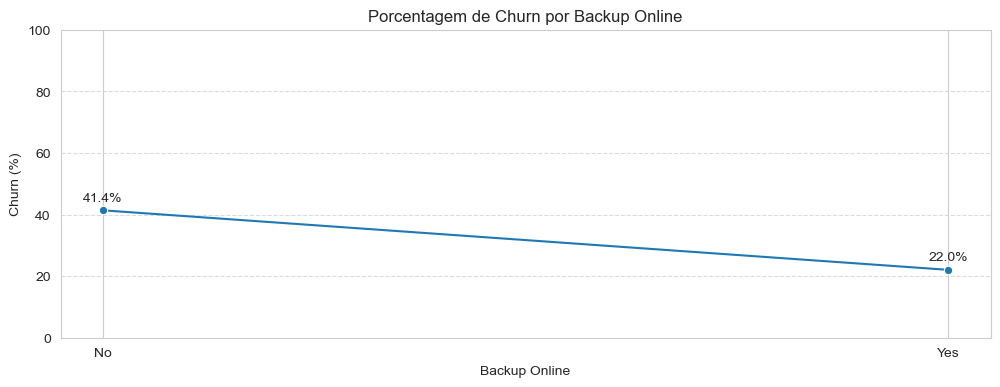

In [160]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Backup_Churn, x="Online Backup", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Backup_Churn.apply(
    lambda row: g.text(
        row["Online Backup"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Backup Online")
plt.ylabel("Churn (%)")
plt.xlabel("Backup Online")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Plano de Seguro de Telefone por Churn

In [161]:
# Criando tabela para o plot
Device_Churn = (
    df.groupby(["Device Protection Plan", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Device Protection Plan", columns="Churn", values="count")
)

# Calculando % de Churn
Device_Churn["Churn %"] = ( Device_Churn[1] / (Device_Churn[0] + Device_Churn[1]) * 100)

Device_Churn.reset_index(inplace= True)

Device_Churn

Churn,Device Protection Plan,0,1,Churn %
0,No,1628,1090,40.103017
1,Yes,1621,496,23.429381


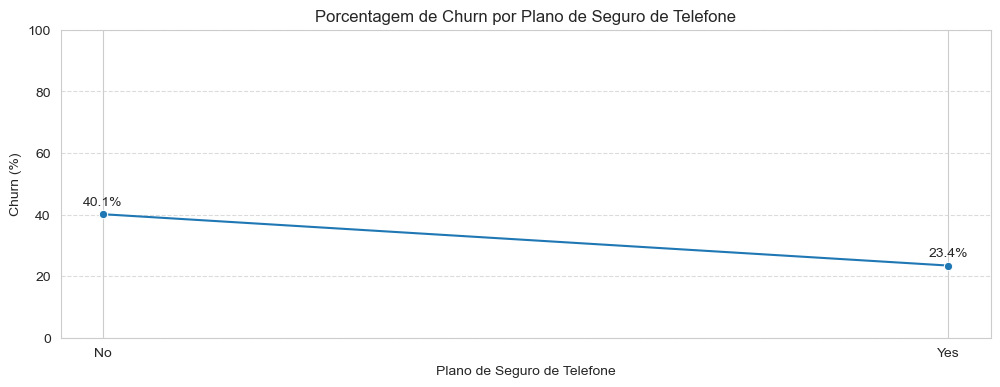

In [162]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Device_Churn, x="Device Protection Plan", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Device_Churn.apply(
    lambda row: g.text(
        row["Device Protection Plan"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Plano de Seguro de Telefone")
plt.ylabel("Churn (%)")
plt.xlabel("Plano de Seguro de Telefone")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Suporte técnico Premium por Churn

In [163]:
# Criando tabela para o plot
Support_Churn = (
    df.groupby(["Premium Tech Support", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Premium Tech Support", columns="Churn", values="count")
)

# Calculando % de Churn
Support_Churn["Churn %"] = ( Support_Churn[1] / (Support_Churn[0] + Support_Churn[1]) * 100)

Support_Churn.reset_index(inplace= True)

Support_Churn

Churn,Premium Tech Support,0,1,Churn %
0,No,1776,1304,42.337662
1,Yes,1473,282,16.068376


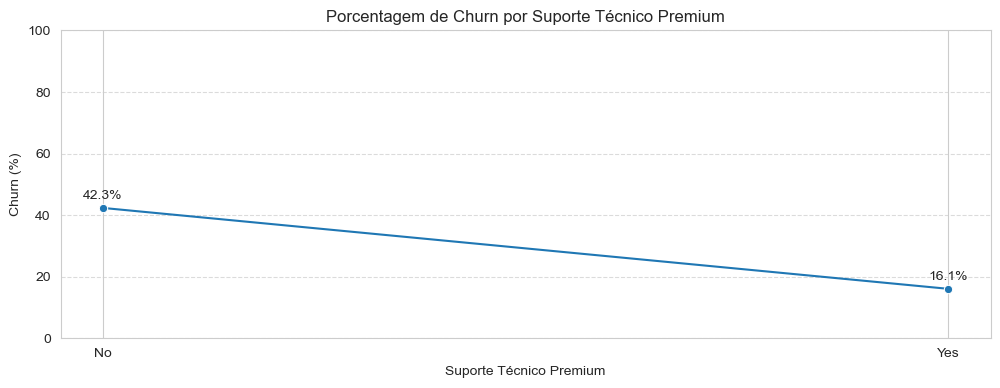

In [164]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Support_Churn, x="Premium Tech Support", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Support_Churn.apply(
    lambda row: g.text(
        row["Premium Tech Support"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Suporte Técnico Premium")
plt.ylabel("Churn (%)")
plt.xlabel("Suporte Técnico Premium")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Streamings de TV por Churn

In [165]:
# Criando tabela para o plot
Tv_Churn = (
    df.groupby(["Streaming TV", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Streaming TV", columns="Churn", values="count")
)

# Calculando % de Churn
Tv_Churn["Churn %"] = ( Tv_Churn[1] / (Tv_Churn[0] + Tv_Churn[1]) * 100)

Tv_Churn.reset_index(inplace= True)

Tv_Churn

Churn,Streaming TV,0,1,Churn %
0,No,1577,836,34.645669
1,Yes,1672,750,30.966144


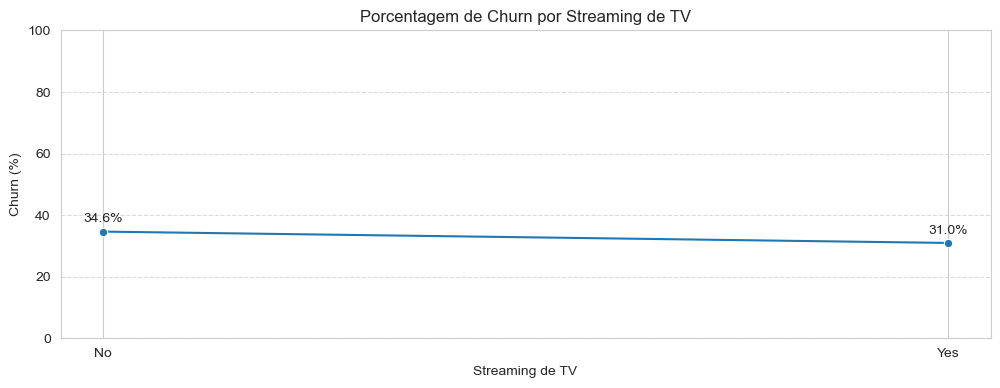

In [166]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Tv_Churn, x="Streaming TV", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Tv_Churn.apply(
    lambda row: g.text(
        row["Streaming TV"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Streaming de TV")
plt.ylabel("Churn (%)")
plt.xlabel("Streaming de TV")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Streaming de Filmes por Churn

In [167]:
# Criando tabela para o plot
Movies_Churn = (
    df.groupby(["Streaming Movies", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Streaming Movies", columns="Churn", values="count")
)

# Calculando % de Churn
Movies_Churn["Churn %"] = ( Movies_Churn[1] / (Movies_Churn[0] + Movies_Churn[1]) * 100)

Movies_Churn.reset_index(inplace= True)

Movies_Churn

Churn,Streaming Movies,0,1,Churn %
0,No,1561,840,34.985423
1,Yes,1688,746,30.649137


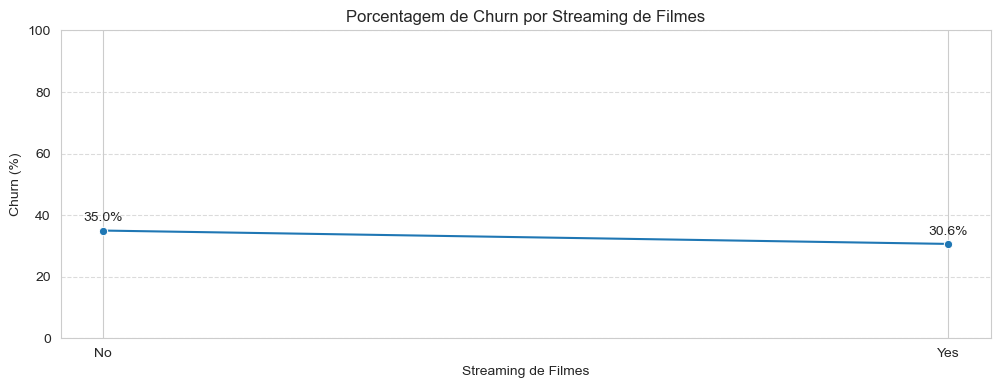

In [168]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Movies_Churn, x="Streaming Movies", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Movies_Churn.apply(
    lambda row: g.text(
        row["Streaming Movies"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Streaming de Filmes")
plt.ylabel("Churn (%)")
plt.xlabel("Streaming de Filmes")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Streaming de Música por Churn

In [169]:
# Criando tabela para o plot
Music_Churn = (
    df.groupby(["Streaming Music", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Streaming Music", columns="Churn", values="count")
)

# Calculando % de Churn
Music_Churn["Churn %"] = ( Music_Churn[1] / (Music_Churn[0] + Music_Churn[1]) * 100)

Music_Churn.reset_index(inplace= True)

Music_Churn

Churn,Streaming Music,0,1,Churn %
0,No,1705,922,35.097069
1,Yes,1544,664,30.072464


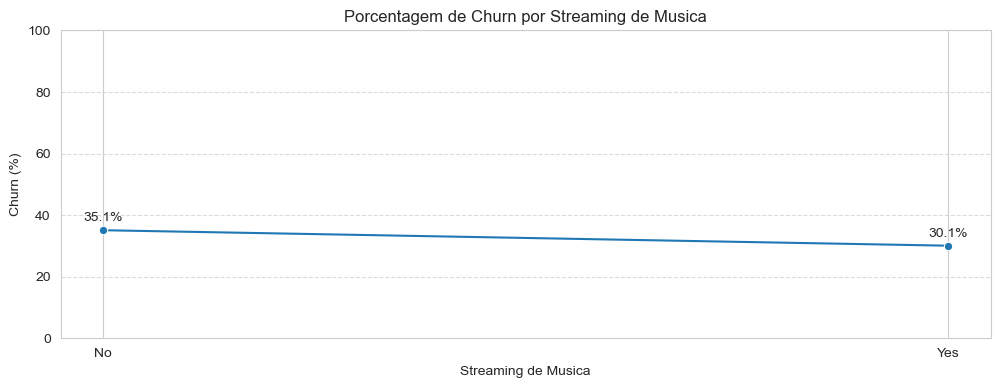

In [191]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Music_Churn, x="Streaming Music", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Music_Churn.apply(
    lambda row: g.text(
        row["Streaming Music"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Streaming de Musica")
plt.ylabel("Churn (%)")
plt.xlabel("Streaming de Musica")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Dados Ilimitado por Churn

In [ ]:
# Criando tabela para o plot
Data_Churn = (
    df.groupby(["Unlimited Data", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Unlimited Data", columns="Churn", values="count")
)

# Calculando % de Churn
Data_Churn["Churn %"] = ( Data_Churn[1] / (Data_Churn[0] + Data_Churn[1]) * 100)

Data_Churn.reset_index(inplace= True)

Data_Churn

Churn,Unlimited Data,0,1,Churn %
0,No,447,222,33.183857
1,Yes,2802,1364,32.741239


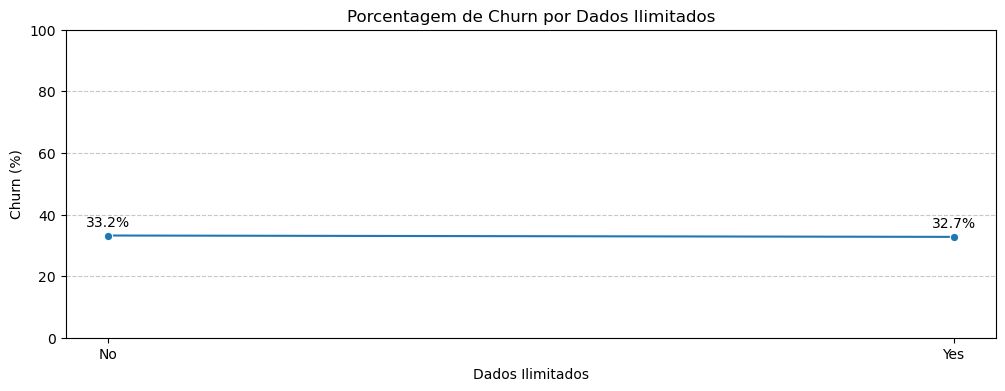

In [ ]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Data_Churn, x="Unlimited Data", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Data_Churn.apply(
    lambda row: g.text(
        row["Unlimited Data"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Dados Ilimitados")
plt.ylabel("Churn (%)")
plt.xlabel("Dados Ilimitados")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Tipo de Contrato por Churn

In [ ]:
# Criando tabela para o plot
Contract_churn = (
    df.groupby(["Contract", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Contract", columns="Churn", values="count")
)

# Calculando % de Churn
Contract_churn["Churn %"] = ( Contract_churn[1] / (Contract_churn[0] + Contract_churn[1]) * 100)

Contract_churn.reset_index(inplace= True)

Contract_churn

Churn,Contract,0,1,Churn %
0,Month-to-Month,1337,1403,51.204380
1,One Year,891,143,13.829787
2,Two Year,1021,40,3.770028


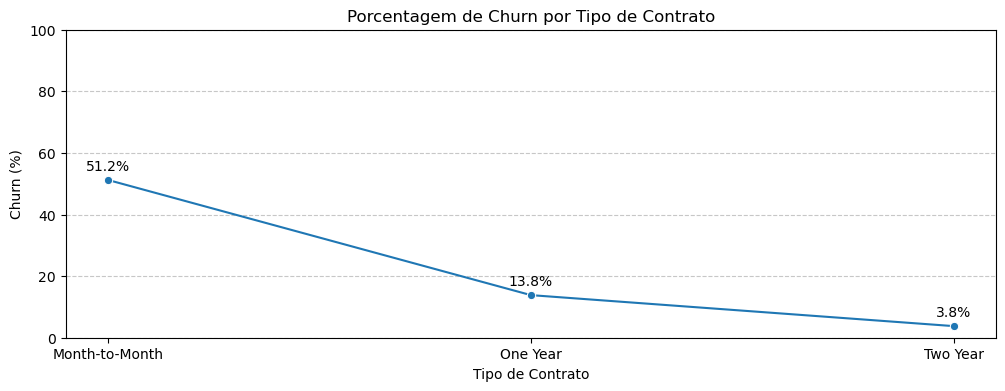

In [ ]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Contract_churn, x="Contract", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Contract_churn.apply(
    lambda row: g.text(
        row["Contract"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Tipo de Contrato")
plt.ylabel("Churn (%)")
plt.xlabel("Tipo de Contrato")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Contas a Pagar por Meio Digital por Churn

In [ ]:
# Criando tabela para o plot
Billing_churn = (
    df.groupby(["Paperless Billing", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Paperless Billing", columns="Churn", values="count")
)

# Calculando % de Churn
Billing_churn["Churn %"] = ( Billing_churn[1] / (Billing_churn[0] + Billing_churn[1]) * 100)

Billing_churn.reset_index(inplace= True)

Billing_churn

Churn,Paperless Billing,0,1,Churn %
0,No,1151,346,23.112892
1,Yes,2098,1240,37.147993


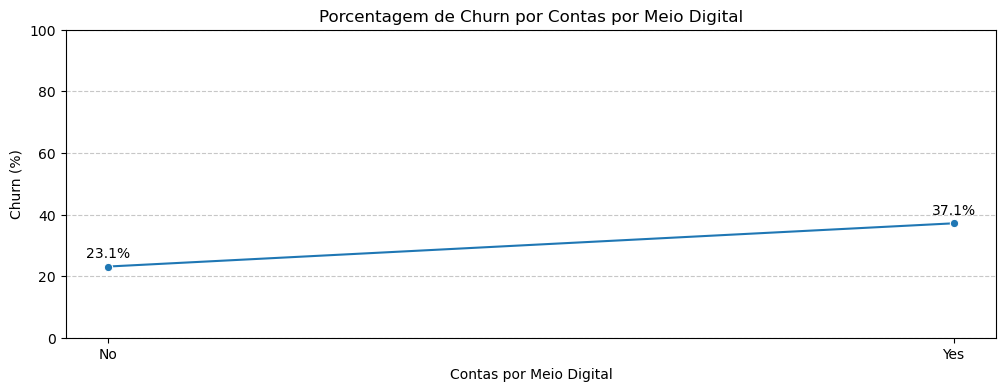

In [ ]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Billing_churn, x="Paperless Billing", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Billing_churn.apply(
    lambda row: g.text(
        row["Paperless Billing"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Contas por Meio Digital")
plt.ylabel("Churn (%)")
plt.xlabel("Contas por Meio Digital")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Método de pagamento por Churn

In [ ]:
# Criando tabela para o plot
Payment_churn = (
    df.groupby(["Payment Method", "Churn"])
    .size()
    .reset_index(name="count")
    .pivot(index="Payment Method", columns="Churn", values="count")
)

# Calculando % de Churn
Payment_churn["Churn %"] = ( Payment_churn[1] / (Payment_churn[0] + Payment_churn[1]) * 100)

Payment_churn.reset_index(inplace= True)

Payment_churn

Churn,Payment Method,0,1,Churn %
0,Bank Withdrawal,1907,1179,38.204796
1,Credit Card,1240,318,20.410783
2,Mailed Check,102,89,46.596859


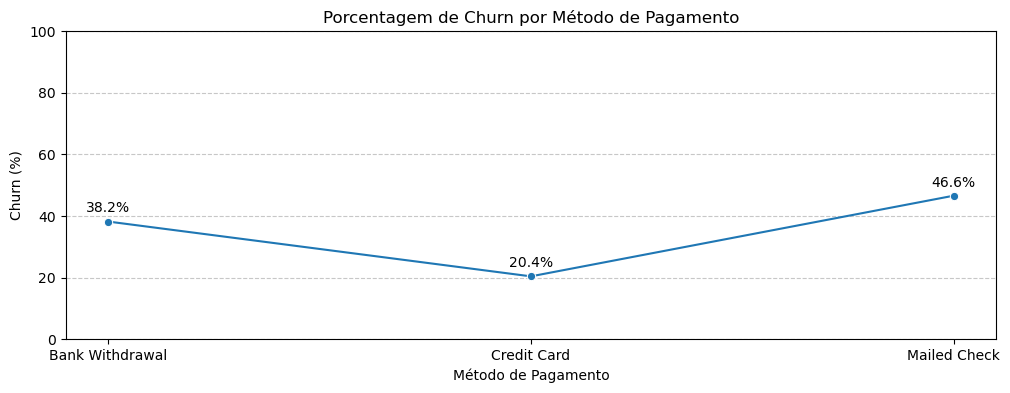

In [ ]:
plt.figure(figsize=(12, 4))

g = sns.lineplot(data=Payment_churn, x="Payment Method", y="Churn %", marker="o")

# Loop para colocar texto nos pontos
texts = Payment_churn.apply(
    lambda row: g.text(
        row["Payment Method"],
        row["Churn %"] + 3,
        f"{row['Churn %']:.1f}%",
        ha="center",
        fontsize=10,
    ),
    axis=1,
)

plt.title("Porcentagem de Churn por Método de Pagamento")
plt.ylabel("Churn (%)")
plt.xlabel("Método de Pagamento")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Resumo das variáveis

- **Há alta evidência de Churn:**
  - Estado Civil
  - N° Dependentes
  - N° indicações
  - Tipos de Ofertas
  - Tipo de Internet
  - Seguro de Internet
  - Backup Online
  - Seguro de Telefone
  - Suporte Técnico Premium
  - Tipo do Contrato/Assinatura de Plano
  - Conta por Meios Digitais
  - Método de Pagamento  
<br/>
- **Há baixa evidência de Churn:**
  - Streaming de TV
  - Streaming de Filmes
  - Streaming de Música   
<br/>
- **Não implica em Churn:**
  - Gênero 
  - Multiplas Linhas  
  - Dados ilimitados
<br/>
- **Inconclusivo quanto ao Churn:**
  - Serviço de telefone
  - Serviço de internet

## Seleção das variáveis

In [171]:
df_final = df.drop(['Customer ID', 'Gender', 'City', 'Zip Code', 'Latitude', 'Longtitude', 'Phone service', 'Multiple Lines', 'Internet Service', 
                    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Customer Status', 'Churn Category'], axis = 1)

In [172]:
df_final.head().T

,0,1,2,3,4
Age,37,46,50,78,75
Married,Yes,No,No,Yes,Yes
Number of Dependents,0,0,0,0,0
Number of Referrals,2,0,0,1,3
Tenure in Months,9,9,4,13,3
Offer,No offer,No offer,Offer E,Offer D,No offer
Average Monthly Long Distance Charges,0.0,0.0,33.65,27.82,0.0
Internet Type,Cable,Cable,Fiber Optic,Fiber Optic,Fiber Optic
Average Monthly GB Download,16.0,10.0,30.0,4.0,11.0
Online Security,No,No,No,No,No


In [173]:
df_final_dummies = pd.get_dummies(df_final, columns = ['Married', 'Number of Referrals', 'Offer', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
                                                       'Premium Tech Support','Contract', 'Paperless Billing', 'Payment Method'], drop_first= True)

In [174]:
df_final_dummies.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,37,46,50,78,75,23,67,52,68,43
Number of Dependents,0,0,0,0,0,3,0,0,0,1
Tenure in Months,9,9,4,13,3,9,71,63,7,65
Average Monthly Long Distance Charges,0.0,0.0,33.65,27.82,0.0,0.0,0.0,0.0,0.0,0.0
Average Monthly GB Download,16.0,10.0,30.0,4.0,11.0,73.0,14.0,7.0,21.0,14.0
Monthly Charge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.65,0.0,0.0
Total Charges,0.0,0.0,280.85,1237.85,0.0,0.0,0.0,0.0,0.0,0.0
Total Refunds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Extra Data Charges,0,10,0,0,0,0,0,20,0,0
Total Long Distance Charges,0.0,0.0,0.0,361.66,0.0,150.93,0.0,0.0,73.71,0.0


## Modelagem

### Train Test Split

In [175]:
X = df_final_dummies.drop('Churn',axis=1)
y = df_final_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [176]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y, test_size=0.30, random_state=101)

### Função para exibição das métricas

In [177]:
def metricas(y_test, pred):
    print('\033[1m  Relatório de classificação:\033[0m' '\n', classification_report(y_test,pred), '\n'
      '\033[1m  Matriz de confusão: \033[0m' '\n', confusion_matrix(y_test,pred), '\n \n'
      '\033[1m  Acurácia: \033[0m' '\n',"%.4f" % accuracy_score(y_test, pred), '\n \n'
      '\033[1m  ROC AUC: \033[0m' '\n',"%.4f" % roc_auc_score(y_test, pred))

### Modelos

#### Decision Tree

##### Achando os melhores parâmetros

In [178]:
dtree = DecisionTreeClassifier(random_state= 101)

param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
}

CV_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
CV_dtree.fit(X_train, y_train)

dtree_best_model = CV_dtree.best_estimator_
print(dtree_best_model)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='sqrt',
                       random_state=101)


##### Modelo final

In [179]:
dtree_final = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='sqrt', random_state=101)
dtree_final.fit(X_train,y_train)
dtree_final_predictions = dtree_final.predict(X_test)

metricas(y_test, dtree_final_predictions)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       947
           1       0.66      0.67      0.67       504

    accuracy                           0.77      1451
   macro avg       0.74      0.75      0.75      1451
weighted avg       0.77      0.77      0.77      1451
 
  Matriz de confusão: 
 [[776 171]
 [165 339]] 
 
  Acurácia: 
 0.7684 
 
  ROC AUC: 
 0.7460


#### Random Forest

##### Achando os melhores parâmetros

In [180]:
rfc = RandomForestClassifier(random_state= 101)

param_grid = { 
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 20, verbose= True, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

rfc_best_model = CV_rfc.best_estimator_
print(rfc_best_model)

Fitting 20 folds for each of 80 candidates, totalling 1600 fits
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=101)


##### Modelo Final

In [181]:
rfc_final=RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50, random_state=101)
rfc_final.fit(X_train,y_train)
rfc_final_predictions = rfc_final.predict(X_test)

metricas(y_test, rfc_final_predictions)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       947
           1       0.77      0.59      0.67       504

    accuracy                           0.80      1451
   macro avg       0.79      0.75      0.76      1451
weighted avg       0.79      0.80      0.79      1451
 
  Matriz de confusão: 
 [[857  90]
 [207 297]] 
 
  Acurácia: 
 0.7953 
 
  ROC AUC: 
 0.7471


#### KNN

##### Achando os melhor parâmetros

In [182]:
KNN = KNeighborsClassifier()

param_grid = dict(n_neighbors=list(range(1,101)))

CV_KNN = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
CV_KNN.fit(X_train, y_train)

KNN_best_model = CV_KNN.best_estimator_
print(KNN_best_model)

KNeighborsClassifier(n_neighbors=95)


##### Modelo final com scaler

In [183]:
knn_s = KNeighborsClassifier(n_neighbors=95)
knn_s.fit(X_train_s,y_train_s)
knn_s_pred = knn_s.predict(X_test_s)

metricas(y_test_s, knn_s_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       947
           1       0.63      0.77      0.69       504

    accuracy                           0.76      1451
   macro avg       0.75      0.76      0.75      1451
weighted avg       0.78      0.76      0.77      1451
 
  Matriz de confusão: 
 [[723 224]
 [118 386]] 
 
  Acurácia: 
 0.7643 
 
  ROC AUC: 
 0.7647


##### Modelo final sem Scaler

In [184]:
knn = KNeighborsClassifier(n_neighbors=95)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

metricas(y_test, knn_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       947
           1       0.64      0.39      0.48       504

    accuracy                           0.71      1451
   macro avg       0.69      0.64      0.64      1451
weighted avg       0.70      0.71      0.69      1451
 
  Matriz de confusão: 
 [[837 110]
 [308 196]] 
 
  Acurácia: 
 0.7119 
 
  ROC AUC: 
 0.6364


#### XGBoost

##### Achando os melhores parâmetros

In [185]:
xgbc = XGBClassifier(random_state= 101)

param_grid = {
    'learning_rate': [0.001, 0.05, 0.1],
    'n_estimators': [50, 100,150],
    'max_depth' : [4,5,6,7,8]
}

CV_xgbc = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv= 45, scoring='accuracy', verbose= True, n_jobs=-1)
CV_xgbc.fit(X_train, y_train)

xgbc_best_model = CV_xgbc.best_estimator_
print(xgbc_best_model)

Fitting 45 folds for each of 45 candidates, totalling 2025 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=90, ...)


##### Modelo final

In [186]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators=150)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

metricas(y_test, xgb_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       947
           1       0.75      0.67      0.71       504

    accuracy                           0.81      1451
   macro avg       0.79      0.78      0.78      1451
weighted avg       0.81      0.81      0.81      1451
 
  Matriz de confusão: 
 [[837 110]
 [166 338]] 
 
  Acurácia: 
 0.8098 
 
  ROC AUC: 
 0.7772


#### Gradient Boosting

##### Achando os melhores parâmetros

In [187]:
gbc = GradientBoostingClassifier(random_state= 101)

param_grid = { 
    'loss': ['log_loss'],
    'learning_rate': [0.001, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth' : [4,6,8],
    'criterion' :['friedman_mse', 'squared_error']
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 10, scoring='accuracy', n_jobs=-1)
CV_gbc.fit(X_train, y_train)

gbc_best_model = CV_gbc.best_estimator_
print(gbc_best_model)

GradientBoostingClassifier(max_depth=4, random_state=101)


In [188]:
gbc = XGBClassifier(max_depth=4, random_state=101)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

metricas(y_test, gbc_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       947
           1       0.72      0.66      0.69       504

    accuracy                           0.79      1451
   macro avg       0.77      0.76      0.77      1451
weighted avg       0.79      0.79      0.79      1451
 
  Matriz de confusão: 
 [[816 131]
 [170 334]] 
 
  Acurácia: 
 0.7926 
 
  ROC AUC: 
 0.7622


# Decisão:

### Modelo escolhido com base na acurácia: **XGBoost**

In [189]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators=150)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

metricas(y_test, xgb_pred)

  Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       947
           1       0.75      0.67      0.71       504

    accuracy                           0.81      1451
   macro avg       0.79      0.78      0.78      1451
weighted avg       0.81      0.81      0.81      1451
 
  Matriz de confusão: 
 [[837 110]
 [166 338]] 
 
  Acurácia: 
 0.8098 
 
  ROC AUC: 
 0.7772


### Variáveis mais importantes são:

Text(0, 0.5, 'Score Variáveis Relevantes')

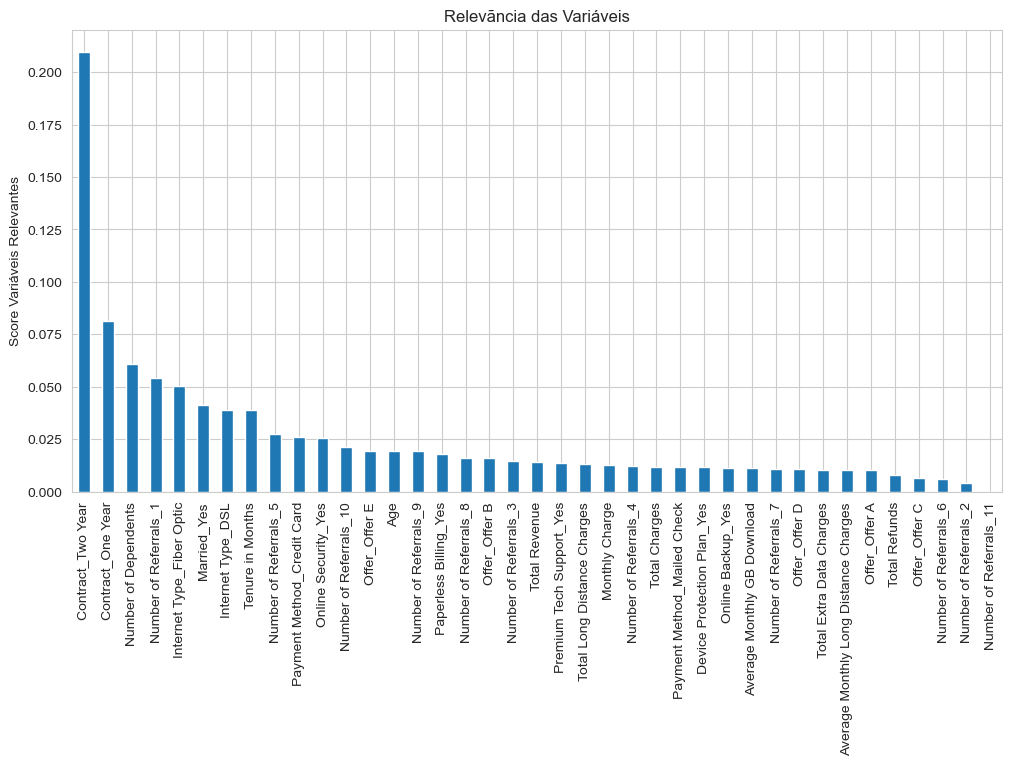

In [192]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

feat_imp = pd.Series(xgb.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Relevãncia das Variáveis')
plt.ylabel('Score Variáveis Relevantes')

# Pergunta 1) 

Com o gráfico acima, conseguimos vizualizar por order de relevância, quais variáveis mais afetam o modelo. Portanto, percebemos que características como _**tempo de duração de contrato**_, _**número de dependentes**_, _**número de indicações**_, _**tipo de internet**_, _**se é casado**_ e o _**tempo de uso do serviço**_, totalizam aproximadamente mais da metade das causas de Churn.

# Pergunta 2) 

Buscaria entender as necessidades e insatisfações dos clientes, para que com base no modelo, eu possa trabalhar dentro dos feedbacks e dos meus indicadores de causa de Churn, propor novas melhorias afim de reduzir esse número, sendo elas: 

- Melhorar o programa de incentivos, para que o cliente recebesse beneficios por indicações, número de dependentes, por tempo de uso de serviço, por adquirir certos pacotes/ofertas, etc.
- Buscaria alterar os prazos dos contratos, deixando mais flexível quanto ao tempo, porém em contra partida, aumentando os serviços que a pessoa deve adquirir para esse tipo de contrato, ou até mesmo incluir esses contratos mais flexíveis como benefícios de uso.
